# Object Detection On Images using YOLO-V3

### Step 1:
1. Import cv2 and numpy libraries. 
2. Then we load yolo v3 algorithm using cv2.dnn.readNet by passing weights and cfg file. 
3. Then we will load all classes names in array using coco.names file.

In [4]:
import cv2

In [5]:
import numpy as np

In [6]:
#Load YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

#### These are the 80 labels or categories YOLO V3 can identify.

In [7]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

## Step 2:
- Next we will define output layers because that’s where we will be defining what object is detected by using __net.getUnconnectedOutLayers__ and __net.getLayerNames__.

- __getUnconnectedOutLayers() __: gives the names of the unconnected output layers, which are essentially the last layers of the network. 
- Then we run the forward pass of the network to get output from the output layers, as you will see  __(net.forward(getOutputsNames(net)))__.

In [8]:
net.getLayerNames()

['conv_0',
 'bn_0',
 'relu_1',
 'conv_1',
 'bn_1',
 'relu_2',
 'conv_2',
 'bn_2',
 'relu_3',
 'conv_3',
 'bn_3',
 'relu_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_6',
 'conv_6',
 'bn_6',
 'relu_7',
 'conv_7',
 'bn_7',
 'relu_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_10',
 'conv_10',
 'bn_10',
 'relu_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_13',
 'conv_13',
 'bn_13',
 'relu_14',
 'conv_14',
 'bn_14',
 'relu_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_17',
 'conv_17',
 'bn_17',
 'relu_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_20',
 'conv_20',
 'bn_20',
 'relu_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_23',
 'conv_23',
 'bn_23',
 'relu_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_26',
 'conv_26',
 'bn_26',
 'relu_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_29',
 'conv_29',
 'bn_29',
 'relu_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_32',
 'conv_32',
 'bn_32',
 'relu_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_35',
 'conv_35',
 'b

In [9]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [10]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [11]:
outputlayers

['yolo_82', 'yolo_94', 'yolo_106']

In [12]:
colors= np.random.uniform(0,255,size=(len(classes),3))

### Step 3:
- Next let us load an image. We will reduce the height and width of our image to scale of 40% and 30%. And save all those values in height,width,channels variables for theoriginal image.

In [13]:
#loading image
img = cv2.imread("demo1.jpg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape

- Let's view the image

Shape of the image:(677, 1024, 3)


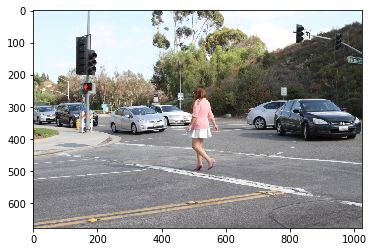

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# To know the shape of images
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("Shape of the image:{}".format(img.shape))

image_and_shapes("demo1.jpg")

- This is our original image from which we want to detect as many objects as possible. But we cannot give this image directly to algorithm.So we need to do some conversion from this image. This is called blob conversion which is basically extracting features from image.

- __We will detect objects in blob by using cv2.dnn.blobFromImage and passing few variables: img is file name, scalefactor of 0.00392, size of image to be used in blob be (416,416), no mean subtraction from layers as (0,0,0), setting True flag means we will be inverting blue with red since OpenCV uses BGR but we have channels in image as RGB.__

### cv.dnn.blobFromImage(img, scale, size, mean)
- __blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)__
- the image to transform
- the scale factor (1/255 to scale the pixel values to [0..1])
- the size, here a 416x416 square image
- the mean value (default=0)
- the option swapBR=True (since OpenCV uses BGR)

In [15]:
#detecting objects
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

- We now pass this blob to network using __net.setInput(blob)__ and then forward this to the __outputlayers__. Here all objects have been detected and outs contains all the information we need to instruct to extract the position of the object like top,left,right,bottom positions,name of class.

In [16]:
net.setInput(blob)
outs = net.forward(outputlayers)

In [17]:
print(outs[1])

[[0.02412063 0.02100607 0.06387271 ... 0.         0.         0.        ]
 [0.01316755 0.02251548 0.30508333 ... 0.         0.         0.        ]
 [0.0204643  0.01580569 0.08328792 ... 0.         0.         0.        ]
 ...
 [0.97446924 0.9782927  0.04635675 ... 0.         0.         0.        ]
 [0.9829865  0.9776553  0.37454426 ... 0.         0.         0.        ]
 [0.9800027  0.9841693  0.07416297 ... 0.         0.         0.        ]]


### Let's evaluate outs by showing information on screen.

In [18]:
#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
        
            #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

In [19]:
confidences

[0.9978955388069153,
 0.8571187853813171,
 0.5657179951667786,
 0.8571401238441467,
 0.9945201277732849,
 0.9958531260490417,
 0.9988687038421631,
 0.9988481998443604,
 0.9605525732040405,
 0.6634319424629211,
 0.8187410235404968,
 0.5150429606437683,
 0.937376081943512]

In [20]:
class_ids

[2, 9, 2, 2, 2, 2, 2, 0, 9, 9, 9, 9, 2]

- There might be cases that multiple time the same object might be detected like below.  We want to eliminate this.
- To eliminate this, we will use Non-Max Suppression(NMS) functionality. What this will do is eliminate the boxes by using some threshold value(any box having value less than 0.6- that will be removed) and it determines that keep only the best of all boxes. And indexes variable will keep track of such unique objects detected. So no multiple detection of same objects.

In [ ]:
#cv2.dnn.NMSBoxes(boxes,confidences,score_threshold,IOU_threshold)
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)#Non Max Suppressions

'''Now using below loop over all found boxes, 
if box is appearing in indexes then only draw rectangle, color it,
put text of class name on it.'''
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,1,(255,255,255),2)
            
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()